# Convolutions

Gargeya Sharma - 220278025 - MSc Artificial Intelligence

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["image.cmap"] = "gray"


In [2]:
## Setting up the Environment

kernelA = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])
kernelB = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])

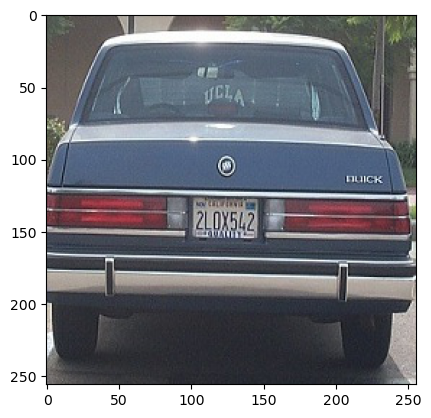

In [3]:
img = plt.imread("../Dataset/DatasetA/car-1.jpg")
plt.imshow(img)

# a.)

In [4]:
def ICV_k_norm(kernel):
    # If the kernel is already normalized than sum == 0, hence we will be dividing by 0. 
    ##  Also, we don't need to normalize an already normalized kernel
    if np.sum(kernel) == 0:
        return kernel
    return kernel/np.sum(kernel)

In [5]:
def ICV_twinFlip(kernel):
    r_indexes = list(range(kernel.shape[0]-1, -1, -1))
    indexes = list(range(kernel.shape[0]))
    k1 = kernel.copy()
    k2 = kernel.copy()
    for i,j in zip(r_indexes, indexes):
        k1[i] = kernel[j]
    for i,j in zip(r_indexes, indexes):
        k2[:,i] = k1[:,j]
    del k1
    return k2

In [6]:
def ICV_convolution(image:np.ndarray, kernel: np.ndarray, stride:int = 1) -> np.ndarray:
    """
    Function is used to apply convolution operation on a 2D image array. The 'kernel'
    is the filter which applies its' specific convolution on the input image.
    
    Params:
    
    image: Input image <numpy.ndarray>
    kernel: Filter to apply on the image <numpy.ndarray>
    stride: The number of pixel shift while moving the kernel over the image
    
    return:
    
    output: Resultant convoluted image <numpy.ndarray>
    """
    
    y_axis, x_axis = image.shape[0:2]
    k_size = kernel.shape[0]
    
    output = np.zeros((((np.array([y_axis,x_axis])-k_size)//stride)+1))
    
    for j in range(0, (y_axis-k_size), stride):
        for i in range(0, x_axis-k_size, stride):
            
            output[j//stride,i//stride] = np.clip(np.abs(np.sum(image[j: j+k_size, i:i+k_size]* ICV_twinFlip(ICV_k_norm(kernel)))//k_size),a_min=0, a_max=255)    
    
    return output

# b.)

In [7]:
kernelC = np.array(
    [[1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]]  )

In [8]:
outputC = ICV_convolution(img, kernelC)

In [9]:
plt.imshow(outputC)

# c.)

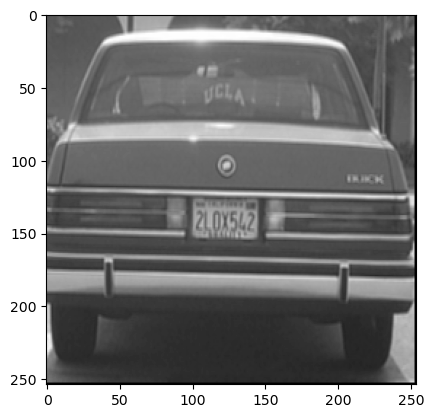

In [10]:
outputA = ICV_convolution(img, kernelA)
plt.savefig("KernelA_output.jpg")
plt.imshow(outputA)

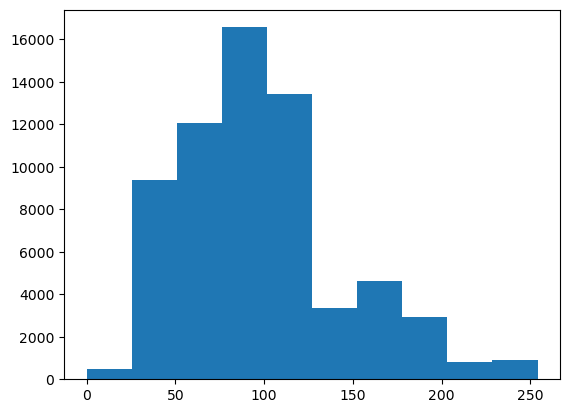

In [11]:
## For Analysis checking if pixel values lies in the range of (0,255) 
## because mistakes done earlier were giving values out this range

plt.hist(outputA.flatten())
plt.show()

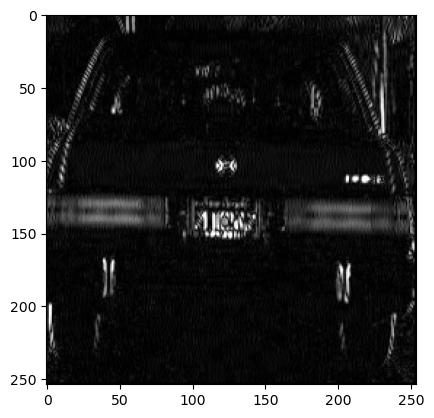

In [12]:
outputB = ICV_convolution(img, kernelB)
plt.savefig("KernelB_output.jpg")
plt.imshow(outputB)

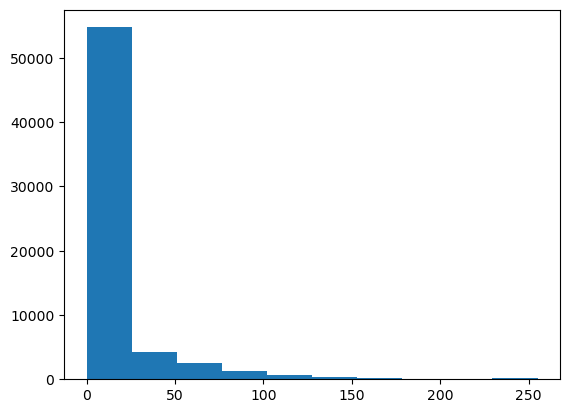

In [13]:
plt.hist(outputB.flatten())
plt.show()

#### Different Laplacian Kernel (Critical Analysis)

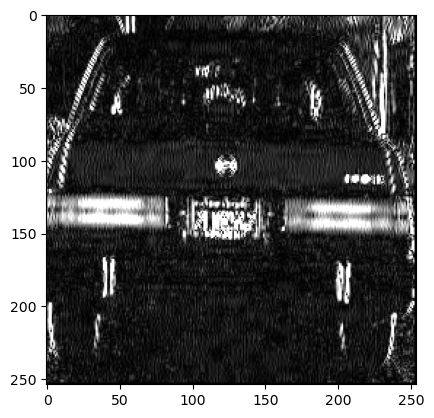

In [14]:
kernelB2 = np.array([[1,1,1],
                   [1,-8,1],
                   [1,1,1]])

outputB2 = ICV_convolution(img, kernelB2)
plt.imshow(outputB2)

# d.)

Use the filtering function for the following filtering operations: 
* (i) A followed by A; 
* (ii) A followed by B; 
* (iii) B followed by A. 

Comment the results.

**Critical Analysis**
Before moving further let us see a way to preserve dimensionality using padding to counter the decrement caused during convolution.

In [15]:
def ICV_zero_pad(img):
    if len(img.shape) == 2:
        print("1 Channel")
        dimy, dimx = img.shape
        temp = np.vstack((np.zeros((1,dimx)), img, np.zeros((1,dimx))))
        temp = np.hstack((np.zeros((dimy+2,1)), temp, np.zeros((dimy+2,1))))
    else:
        dimy, dimx, channels = img.shape
        print(f"{channels} channels")
        temp = np.vstack((np.zeros((1,dimx,channels)), img, np.zeros((1,dimx,channels))))
        temp = np.hstack((np.zeros((dimy+2,1,channels)), temp, np.zeros((dimy+2,1,channels))))
    return temp

##### (i) A followed by A

Dimensions of Raw image: (256, 256, 3) || Dimensions after first Convolution: (254, 254), Dimensions after second Convolution: (252, 252)


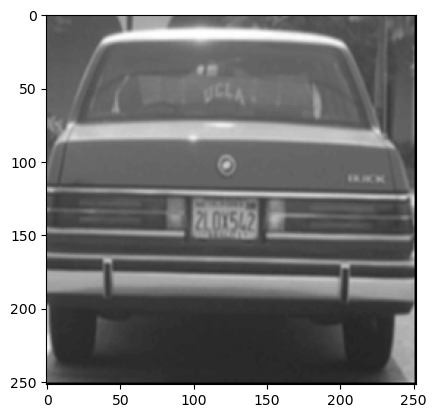

In [16]:
output = ICV_convolution(img, kernelA)
output2 = ICV_convolution(output, kernelA)
print(f"Dimensions of Raw image: {img.shape} || Dimensions after first Convolution: {output.shape}, Dimensions after second Convolution: {output2.shape}")
plt.imshow(output2)

##### (ii) A followed by B

In [17]:
output = ICV_convolution(img, kernelA)
output2 = ICV_convolution(output, kernelB)
print(f"Dimensions of Raw image: {img.shape} || Dimensions after first Convolution: {output.shape}, Dimensions after second Convolution: {output2.shape}")
plt.imshow(output2)

Dimensions of Raw image: (256, 256, 3) || Dimensions after first Convolution: (254, 254), Dimensions after second Convolution: (252, 252)


##### (iii) B followed by A

In [18]:
output = ICV_convolution(img, kernelB)
output2 = ICV_convolution(output, kernelA)
print(f"Dimensions of Raw image: {img.shape} || Dimensions after first Convolution: {output.shape}, Dimensions after second Convolution: {output2.shape}")
plt.imshow(output2)

Dimensions of Raw image: (256, 256, 3) || Dimensions after first Convolution: (254, 254), Dimensions after second Convolution: (252, 252)
